In [1]:
# https://365datascience.com/tutorials/python-tutorials/build-customer-segmentation-models/#1

In [2]:
import pandas as pd
df = pd.read_csv('data.csv',encoding='unicode_escape')

### Calculating rank and recency.

In [3]:
# convert date column to datetime format
df['Date']= pd.to_datetime(df['InvoiceDate'])
# keep only the most recent date of purchase
df['rank'] = df.sort_values(['CustomerID','Date']).groupby(['CustomerID'])['Date'].rank(method='min').astype(int)
df_rec = df[df['rank']==1]

In [4]:
df_rec['recency'] = (df_rec['Date'] - pd.to_datetime(min(df_rec['Date']))).dt.days

C:\Users\pc\AppData\Local\Temp\ipykernel_13092\3505644634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rec['recency'] = (df_rec['Date'] - pd.to_datetime(min(df_rec['Date']))).dt.days


In [5]:
df_rec.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,rank,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,1,0
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,1,0


### Frequency(frequency — how many times has each customer made a purchase on the platform)

In [6]:
freq = df_rec.groupby('CustomerID')['Date'].count()

In [7]:
df_freq = pd.DataFrame(freq).reset_index()

In [8]:
df_freq.columns

Index(['CustomerID', 'Date'], dtype='object')

In [9]:
df_freq.columns = ['CustomerID','frequency']

In [10]:
df_freq.columns

Index(['CustomerID', 'frequency'], dtype='object')

### Now, new dataframe is merged with the previous one on "CustomerID"

In [11]:
rec_freq = df_freq.merge(df_rec, on = 'CustomerID')

In [12]:
rec_freq.head()

,CustomerID,frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date,rank,recency
0,12346.0,1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,United Kingdom,2011-01-18 10:01:00,1,48
1,12347.0,31,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/07/2010 14:57,2.10,Iceland,2010-12-07 14:57:00,1,6
2,12347.0,31,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/07/2010 14:57,4.25,Iceland,2010-12-07 14:57:00,1,6
3,12347.0,31,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/07/2010 14:57,3.25,Iceland,2010-12-07 14:57:00,1,6
4,12347.0,31,537626,22492,MINI PAINT SET VINTAGE,36,12/07/2010 14:57,0.65,Iceland,2010-12-07 14:57:00,1,6


In [32]:
rec_freq[rec_freq['frequency'] == 182]

,CustomerID,frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date,rank,recency,total


### Monetary Value (Finally, we can calculate each user’s monetary value to understand the total amount they have spent on the platform.)

In [13]:
rec_freq['total'] = rec_freq['Quantity']*df['UnitPrice']
m = rec_freq.groupby('CustomerID')['total'].sum()
print(m)
m = pd.DataFrame(m).reset_index()

CustomerID
12346.0    189248.25
12347.0      1246.73
12348.0      4311.90
12349.0      1618.81
12350.0       553.25
             ...    
18280.0       229.79
18281.0        92.29
18282.0       159.91
18283.0       201.54
18287.0       863.40
Name: total, Length: 4372, dtype: float64


In [14]:
m.head()

,CustomerID,total
0,12346.0,189248.25
1,12347.0,1246.73
2,12348.0,4311.90
3,12349.0,1618.81
4,12350.0,553.25


In [15]:
m.columns = ['CustomerID','monetary_value']
m.head()

,CustomerID,monetary_value
0,12346.0,189248.25
1,12347.0,1246.73
2,12348.0,4311.90
3,12349.0,1618.81
4,12350.0,553.25


In [16]:
#The new dataframe we created consists of each CustomerID and its associated
#monetary value. Let’s merge this with the main dataframe:

rfm = m.merge(rec_freq, on='CustomerID')
rfm.head()

,CustomerID,monetary_value,frequency,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Date,rank,recency,total
0,12346.0,189248.25,1,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,United Kingdom,2011-01-18 10:01:00,1,48,189248.25
1,12347.0,1246.73,31,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/07/2010 14:57,2.10,Iceland,2010-12-07 14:57:00,1,6,40.68
2,12347.0,1246.73,31,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/07/2010 14:57,4.25,Iceland,2010-12-07 14:57:00,1,6,11.00
3,12347.0,1246.73,31,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/07/2010 14:57,3.25,Iceland,2010-12-07 14:57:00,1,6,40.68
4,12347.0,1246.73,31,537626,22492,MINI PAINT SET VINTAGE,36,12/07/2010 14:57,0.65,Iceland,2010-12-07 14:57:00,1,6,122.04


In [17]:
#Now, let’s select only the columns required to build the customer segmentation model:

finaldf = rfm[['CustomerID','recency','frequency','monetary_value']]

In [18]:
type(finaldf < 3)

pandas.core.frame.DataFrame

In [19]:
a = pd.DataFrame({'c1' : [1,2.5,3,4,5], 'c2' : [5,2,3,4,5]})
a < 3

,c1,c2
0,True,False
1,True,True
2,False,False
3,False,False
4,False,False


In [20]:
kd=(a<3).all(axis = 1)
type(kd)

pandas.core.series.Series

In [21]:
a.columns

Index(['c1', 'c2'], dtype='object')

In [22]:
a['kd1'] = kd
a.head()

,c1,c2,kd1
0,1.0,5,False
1,2.5,2,True
2,3.0,3,False
3,4.0,4,False
4,5.0,5,False


In [23]:
a = a[kd]
a.head()

,c1,c2,kd1
1,2.5,2,True


## Removing Outliers

recency: 


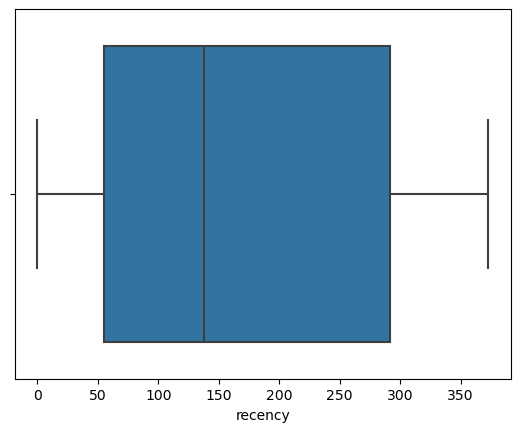

frequency: 


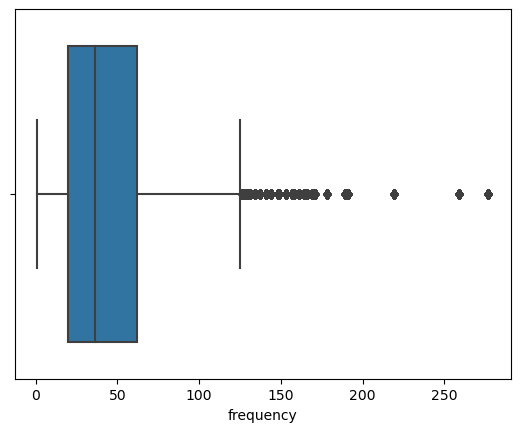

monetary_value: 


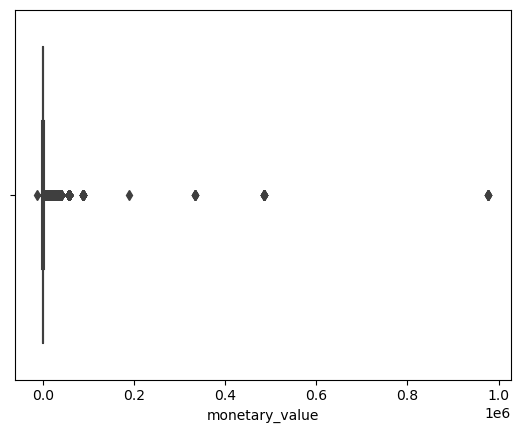

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
list1 = ['recency','frequency','monetary_value']
for i in list1:
    print(str(i)+': ')
    
    ax = sns.boxplot(x=finaldf[str(i)])
    plt.show()

In [26]:
from scipy import stats
import numpy as np
# remove the customer id column
new_df = finaldf[['recency','frequency','monetary_value']]
print(new_df.head())
# remove outliers
z_scores = stats.zscore(new_df)
#print(z_scores.head())
abs_z_scores = np.abs(z_scores)
#print('----------------------------------------')
print(abs_z_scores.head())
#print(len(abs_z_scores < 3))
filtered_entries = (abs_z_scores < 3).all(axis=1)
#print('-------------------------------------------')
print(type(filtered_entries))
print(filtered_entries)
new_df = new_df[filtered_entries]
new_df.head()

   recency  frequency  monetary_value
0       48          1       189248.25
1        6         31         1246.73
2        6         31         1246.73
3        6         31         1246.73
4        6         31         1246.73
    recency  frequency  monetary_value
0  0.955294   1.149226       18.606263
1  1.300241   0.402500        0.049886
2  1.300241   0.402500        0.049886
3  1.300241   0.402500        0.049886
4  1.300241   0.402500        0.049886
<class 'pandas.core.series.Series'>
0         False
1          True
2          True
3          True
4          True
          ...  
100805     True
100806     True
100807     True
100808     True
100809     True
Length: 100810, dtype: bool


,recency,frequency,monetary_value
1,6,31,1246.73
2,6,31,1246.73
3,6,31,1246.73
4,6,31,1246.73
5,6,31,1246.73


In [28]:
new_df.iloc[32]

recency             15.0
frequency           17.0
monetary_value    4311.9
Name: 33, dtype: float64

In [ ]:
new_df.head()

In [33]:
from sklearn.preprocessing import StandardScaler
new_df = new_df.drop_duplicates()
col_names = ['recency', 'frequency', 'monetary_value']
features = new_df[col_names]
scaler = StandardScaler()
scaler.fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

In [34]:
scaled_features.head()

,recency,frequency,monetary_value
0,-1.196723,0.379971,0.185080
1,-1.120665,-0.259085,1.965919
2,1.752654,2.297138,0.401256
3,-0.715020,-0.259085,-0.217826
4,-0.596706,-0.350378,0.011294


In [35]:
from sklearn import cluster
type(cluster.KMeans)

type

Text(0, 0.5, 'Inertia')

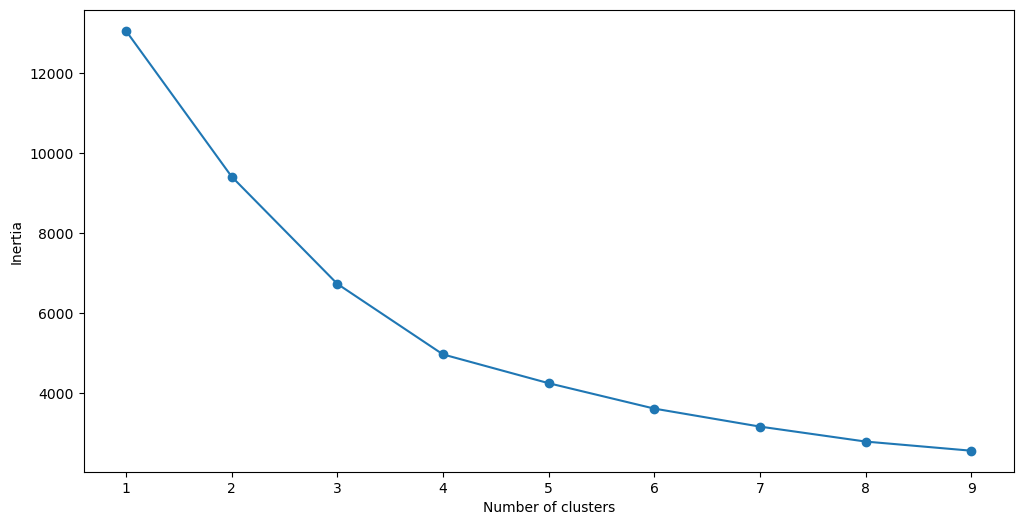

In [36]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [37]:
# The above plot is elbow curve. 
# From the above curve as we moved from 4 to 5 clusters, the value of inertia is not decresed too much. 
# Hence, just 4 clusters must be formed

In [38]:
kmeans = KMeans( n_clusters = 4, init='k-means++')
kmeans.fit(scaled_features)

KMeans(n_clusters=4)

In [39]:
#https://neptune.ai/blog/k-means-clustering#:~:text=K%2Dmeans%2B%2B%20is%20a,as%20possible%20from%20one%20another.

#K-Means++
#K-means++ is a smart centroid initialization method for the K-mean algorithm. The goal is to spread out the initial centroid by assigning the first centroid randomly then selecting the rest of the centroids based on the maximum squared distance. The idea is to push the centroids as far as possible from one another.

#Here are the simple steps to initialize centroids using K-means++:

#1.Randomly pick the first centroid (C1)
#2.Calculate the distance between all data points and the selected centroid
#The distance between all data points and the selected centroid.
#This denotes the distance of a data point xi from the farthest centroid Cj

#3.Initialize the data point xi as the new centroid
#Repeat steps 3 and 4 till all the defined K clusters are found

In [40]:
len(scaled_features)

4353

In [41]:
# https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/#:~:text=The%20silhouette%20coefficient%20or%20silhouette,to%20other%20clusters%20(separation).

In [42]:
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))

0.43600059110868045


In [43]:
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(new_df)
frame['cluster'] = pred

In [44]:
for i in range(4):
    print(frame[frame['cluster'] == i])

        recency  frequency  monetary_value  cluster
1             6         31         1246.73        0
32           15         17         4311.90        0
122          63         17          553.25        0
139          77         15          947.61        0
154         169          4           73.40        0
...         ...        ...             ...      ...
100626      107          5           87.75        0
100631      127         33         1926.60        0
100664      116          1           99.00        0
100690       55          1           -3.95        0
100700       96         10          229.79        0

[2380 rows x 4 columns]
        recency  frequency  monetary_value  cluster
396         223         12          119.20        1
522         261         34         1106.00        1
577         369         11          366.55        1
767         348         33         1041.08        1
800         275         11          169.03        1
...         ...        ...             

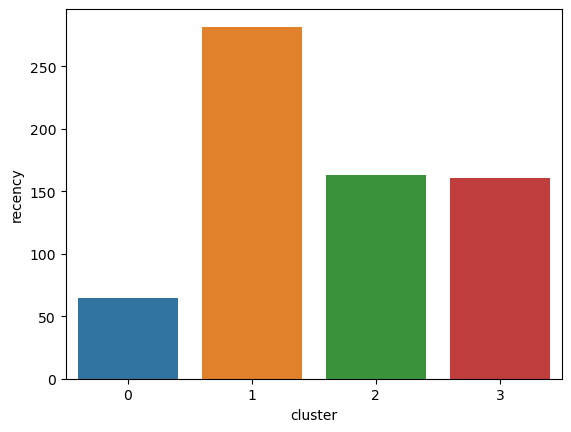

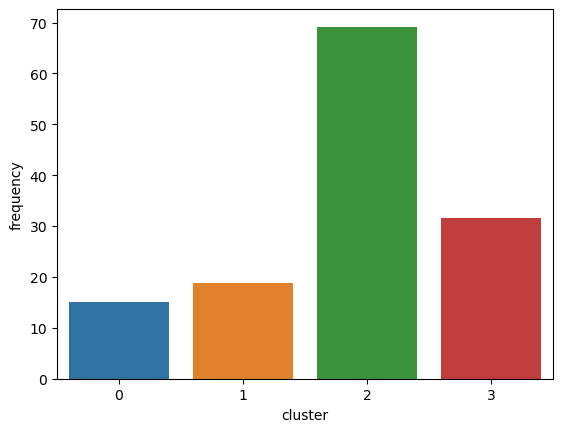

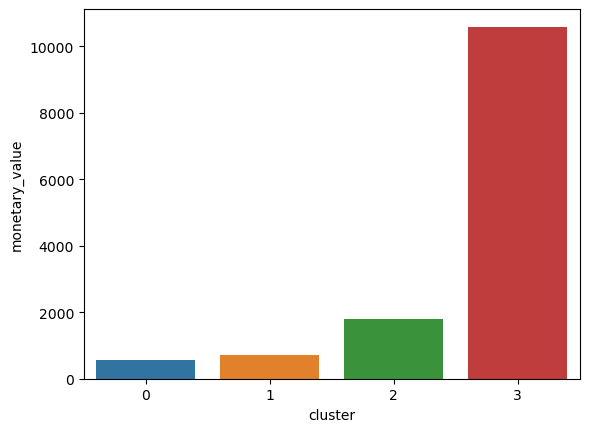

In [45]:
avg_df = frame.groupby(['cluster'], as_index=False).mean()
for i in list1:
    sns.barplot(x='cluster',y=str(i),data=avg_df)
    plt.show()